In [ ]:
This dataset contains information about loan eligibility prediction.

The columns in the given dataset are as follows:
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [1]:
#importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing plotly library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()


In [3]:
df=pd.read_csv("Loan.csv")  #dataset

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

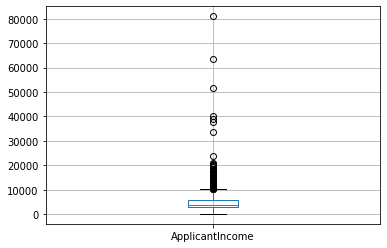

In [10]:
df.boxplot(column="ApplicantIncome")

<AxesSubplot:>

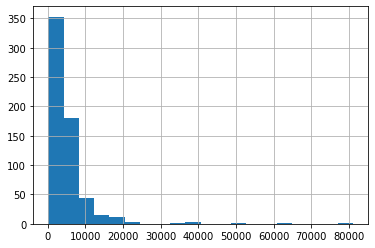

In [11]:
df["ApplicantIncome"].hist(bins=20)

<AxesSubplot:>

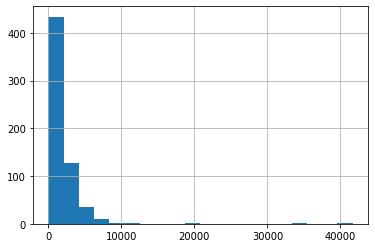

In [12]:
df["CoapplicantIncome"].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

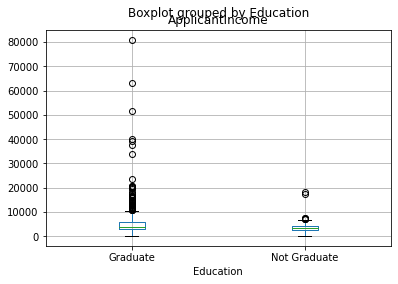

In [13]:
df.boxplot(column="ApplicantIncome",by="Education")

<AxesSubplot:>

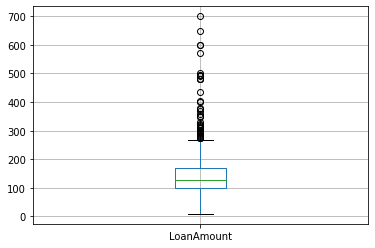

In [14]:
df.boxplot(column="LoanAmount")

<AxesSubplot:>

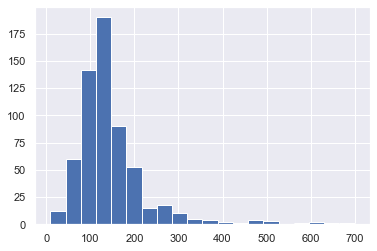

In [62]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

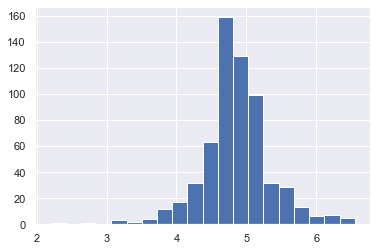

In [63]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [18]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [19]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [20]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [21]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [55]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

In [56]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [57]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [58]:
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [68]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [69]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

<AxesSubplot:>

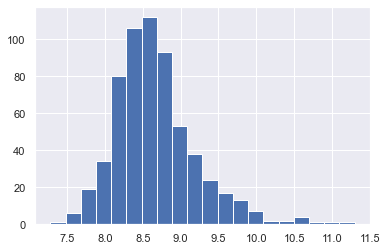

In [70]:
df['TotalIncome_log'].hist(bins=20)

In [71]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [72]:
loan=sns.load_dataset("Loan")

In [73]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [74]:
sns.set(style="darkgrid")

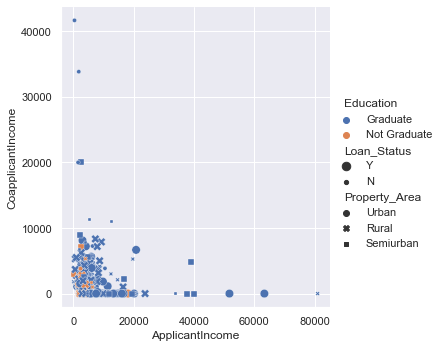

In [75]:
sns.relplot(x="ApplicantIncome",y="CoapplicantIncome",hue="Education",style="Property_Area",size="Loan_Status",height=5,aspect=1,data=loan)

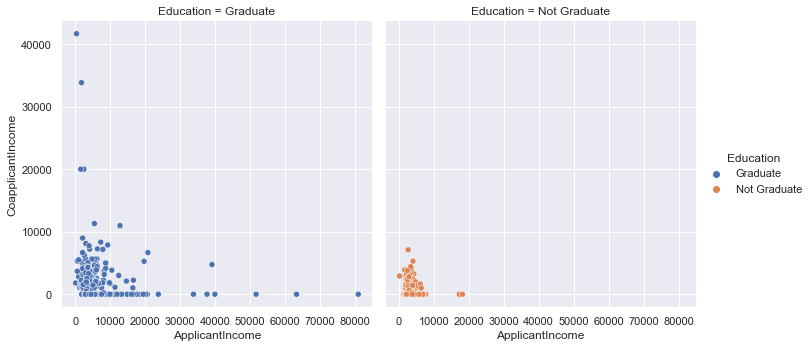

In [66]:
sns.relplot(x="ApplicantIncome",y="CoapplicantIncome",hue="Education",col="Education",data=loan)

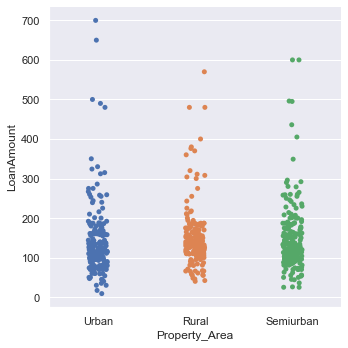

In [67]:
sns.catplot(x="Property_Area",y="LoanAmount",data=loan)

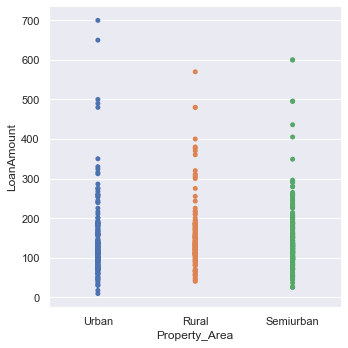

In [35]:
sns.catplot(x="Property_Area",y="LoanAmount",data=loan,jitter=False)

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



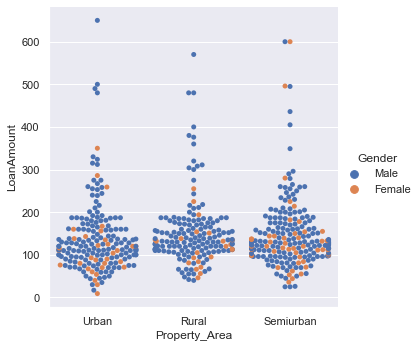

In [36]:
sns.catplot(x="Property_Area",y="LoanAmount",data=loan,kind="swarm",hue="Gender")

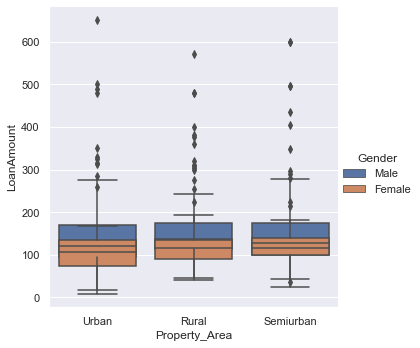

In [39]:
sns.catplot(x="Property_Area",y="LoanAmount",kind="box",data=loan,hue="Gender",dodge=False)

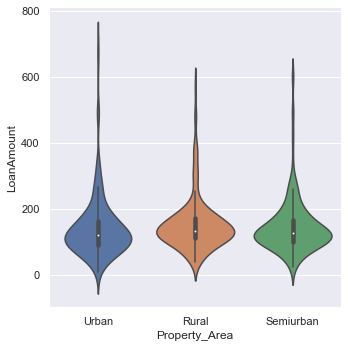

In [40]:
sns.catplot(x="Property_Area",y="LoanAmount",kind="violin",data=loan)

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

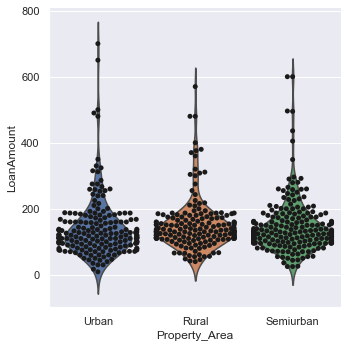

In [41]:
g=sns.catplot(x="Property_Area",y="LoanAmount",kind="violin",data=loan,inner=None)
sns.swarmplot(x="Property_Area",y="LoanAmount",data=loan,ax=g.ax,color="k")

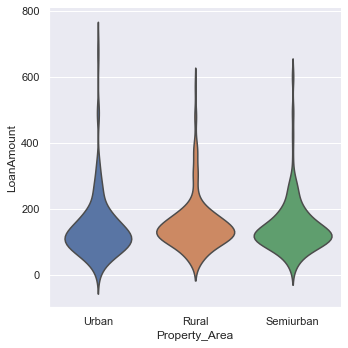

In [42]:
sns.catplot(x="Property_Area",y="LoanAmount",kind="violin",data=loan,inner=None)

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

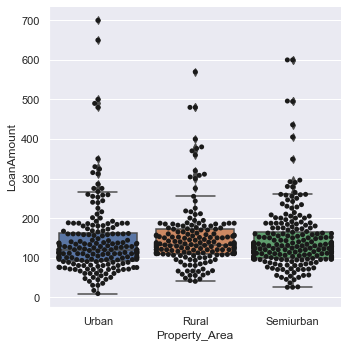

In [43]:
g=sns.catplot(x="Property_Area",y="LoanAmount",kind="box",data=loan)
sns.swarmplot(x="Property_Area",y="LoanAmount",data=loan,ax=g.ax,color="k")

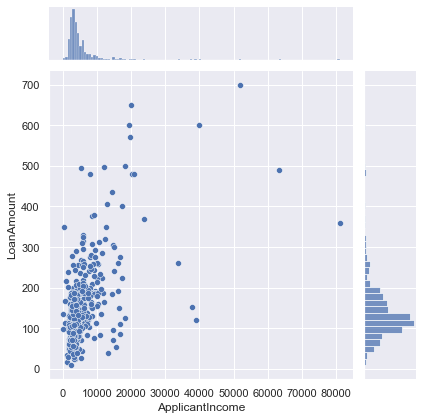

In [44]:
sns.jointplot(x=loan["ApplicantIncome"],y=loan["LoanAmount"])

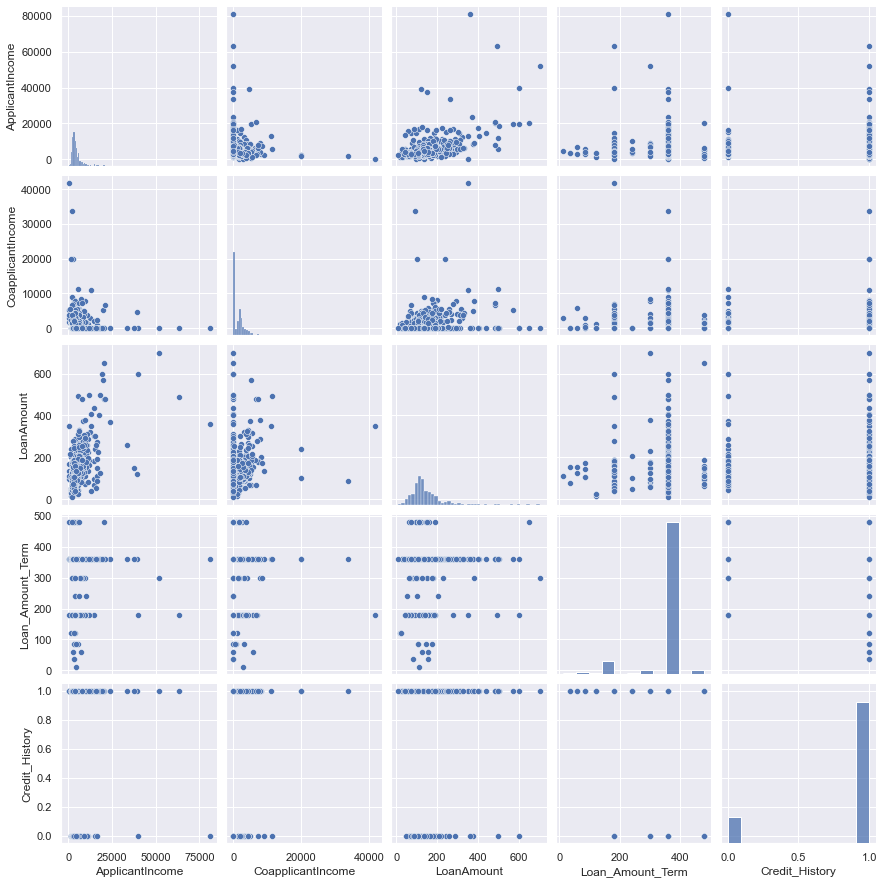

In [45]:
sns.pairplot(loan)

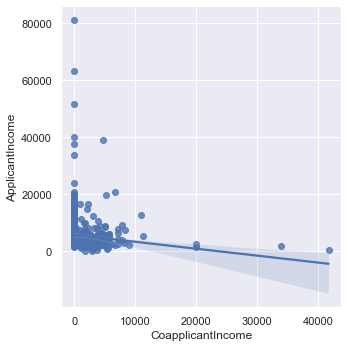

In [46]:
sns.lmplot(x="CoapplicantIncome",y="ApplicantIncome",data=loan)

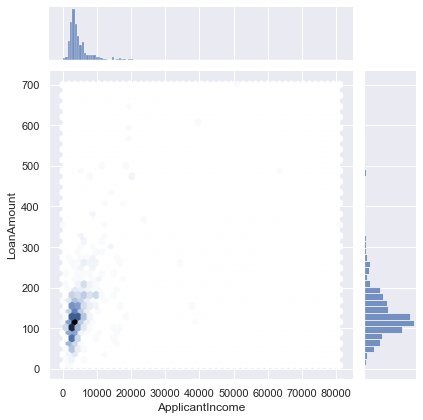

In [47]:
sns.jointplot(x="ApplicantIncome",y="LoanAmount",data=loan,kind="hex")

Text(0, 0.5, 'This is Y Label')

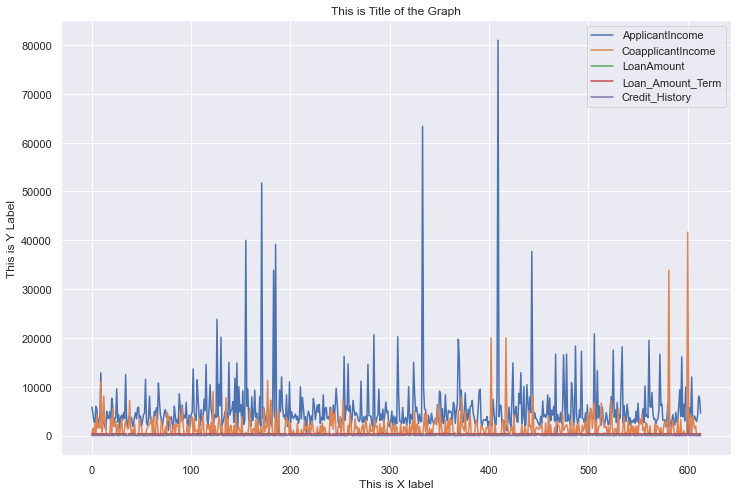

In [48]:
ax=loan.plot(figsize=(12,8),title="This is Title of the Graph")
ax.set_xlabel("This is X label")
ax.set_ylabel("This is Y Label")

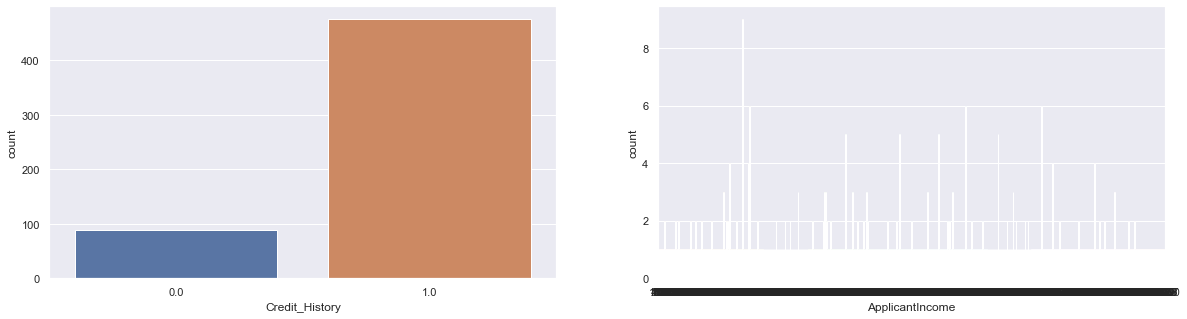

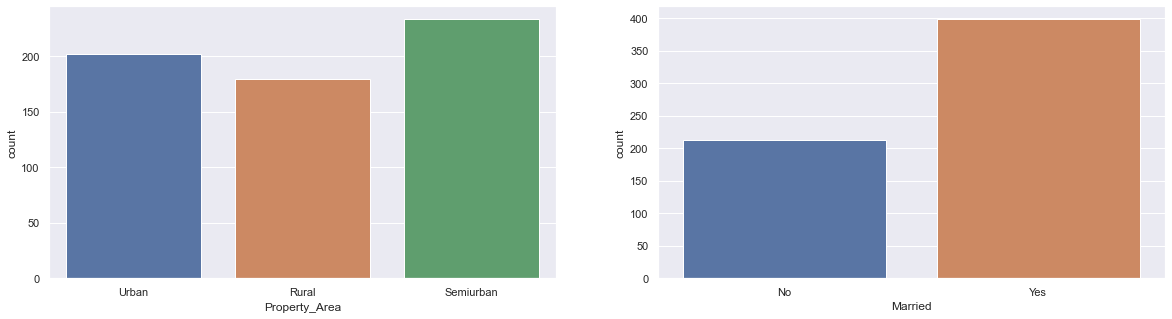

In [50]:
cat_cols = ['Credit_History','ApplicantIncome','Property_Area','Married']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=loan)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=loan)
    i += 1
    
    plt.show()

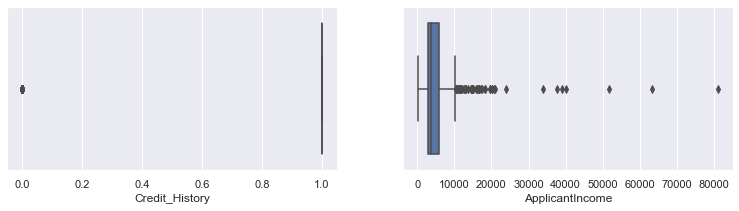

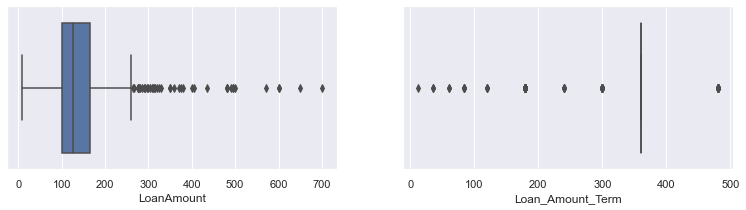

In [83]:
num_cols =['Credit_History','ApplicantIncome','LoanAmount','Loan_Amount_Term']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [84]:
df['ApplicantIncome'].quantile(0.99)

32540.410000000047

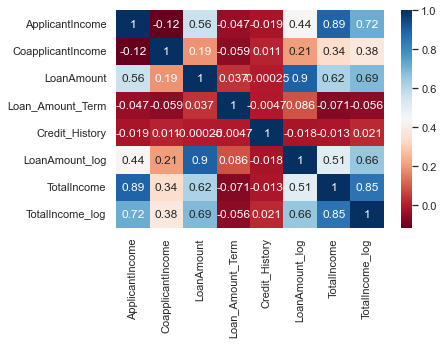

In [85]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()